In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
df = pd.read_csv("devices_dataset.csv")
df.head()

DEVICES  STORAGE  MEMORY  CACHE MEMORY  POWER CONSUMPTION  \
0          acer predator      256       8             8                130   
1         raspberry pi 4      128       4             2                 15   
2     Lenovo Ideapad 520      512       8             4                 65   
3      HP x360 Pavillion      128       8             8                 65   
4  dell inspiron desktop      256       4             6                145   

   PROCESSOR  
0        2.3  
1        1.5  
2        1.6  
3        1.8  
4        2.8

In [3]:
X = df.values
laptop_full_info = df.values

In [4]:
X = X[ : , 1 :  ]
Y = np.arange(X.shape[0])

In [5]:
print(X)
print(Y)
print(Y.shape)

[[256 8 8 130 2.3]
 [128 4 2 15 1.5]
 [512 8 4 65 1.6]
 [128 8 8 65 1.8]
 [256 4 6 145 2.8]
 [256 8 4 145 2.7]
 [512 4 4 85 1.4]
 [256 6 4 35 1.4]
 [128 12 6 26 2.0]
 [512 8 6 65 1.0]]
[0 1 2 3 4 5 6 7 8 9]
(10,)


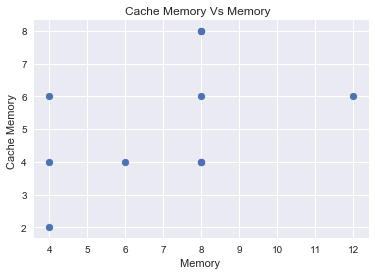

In [6]:
plt.scatter(X[: , 1] , X[: , 2])
plt.title("Cache Memory Vs Memory  ")
plt.xlabel("Memory ")
plt.ylabel("Cache Memory ")
plt.show()

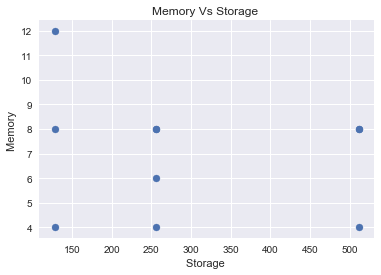

In [7]:
plt.scatter(X[: , 0] , X[: , 1])
plt.title("Memory Vs Storage ")
plt.xlabel("Storage ")
plt.ylabel("Memory ")
plt.show()

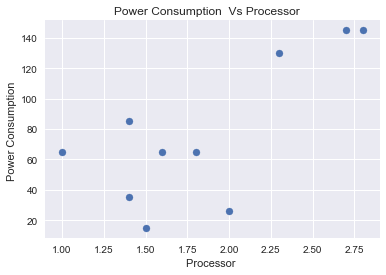

In [8]:
plt.scatter(X[: , 4] , X[: , 3])
plt.title("Power Consumption  Vs Processor   ")
plt.xlabel("Processor ")
plt.ylabel("Power Consumption ")
plt.show()

In [9]:
df.head()

DEVICES  STORAGE  MEMORY  CACHE MEMORY  POWER CONSUMPTION  \
0          acer predator      256       8             8                130   
1         raspberry pi 4      128       4             2                 15   
2     Lenovo Ideapad 520      512       8             4                 65   
3      HP x360 Pavillion      128       8             8                 65   
4  dell inspiron desktop      256       4             6                145   

   PROCESSOR  
0        2.3  
1        1.5  
2        1.6  
3        1.8  
4        2.8

In [10]:
A1 = np.array(X)
non_beng = [0.49536008 ,  0.25768856 ,  0.04479474 ,  0.08431433 ,  0.11784228]

In [11]:
print(A1)

[[256 8 8 130 2.3]
 [128 4 2 15 1.5]
 [512 8 4 65 1.6]
 [128 8 8 65 1.8]
 [256 4 6 145 2.8]
 [256 8 4 145 2.7]
 [512 4 4 85 1.4]
 [256 6 4 35 1.4]
 [128 12 6 26 2.0]
 [512 8 6 65 1.0]]


In [12]:
def squaremat():
    square = []
    m , n  = A1.shape
    for j in range(n):
        squ = 0.0 
        for k in range(m):
            squ+=A1[k][j]*A1[k][j]
        square.append(pow(squ , 0.5));
    return square
square = squaremat()
def A2_matrix():    
    A2 = []
    m , n = A1.shape
    for i in range(m):
        for j in range(n):
            x = A1[i][j] / square[j] 
            A2.append(x)
    A2 = np.array(A2).reshape((m ,n))
    return A2
Normalized_matrix = A2_matrix()
print(Normalized_matrix)

[[0.24433889 0.34174306 0.45883147 0.45684112 0.37614051]
 [0.12216944 0.17087153 0.11470787 0.05271244 0.24530903]
 [0.48867778 0.34174306 0.22941573 0.22842056 0.26166296]
 [0.12216944 0.34174306 0.45883147 0.22842056 0.29437083]
 [0.24433889 0.17087153 0.3441236  0.50955356 0.45791018]
 [0.24433889 0.34174306 0.22941573 0.50955356 0.44155625]
 [0.48867778 0.17087153 0.22941573 0.29870381 0.22895509]
 [0.24433889 0.2563073  0.22941573 0.12299569 0.22895509]
 [0.12216944 0.51261459 0.3441236  0.09136822 0.3270787 ]
 [0.48867778 0.34174306 0.3441236  0.22842056 0.16353935]]


In [13]:
A2 = Normalized_matrix
def A3_matrix():
    m , n = A2.shape 
    A3 = [] 
    for i in range(m):
        for j in range(n):
            A3.append(A2[i][j]*non_beng[j])
    A3 = np.array(A3).reshape(A2.shape)
    return A3
Weighted_Normalised_matrix = A3_matrix()
#print(Weighted_Normalised_matrix)

In [14]:
minnn = Weighted_Normalised_matrix.min(axis=0)
maxxx = Weighted_Normalised_matrix.max(axis=0)
Vplus = np.array([maxxx[0] ,maxxx[1],maxxx[2] ,minnn[3] , maxxx[4] ] )
Vminus  =np.array( [ minnn[0],minnn[1],minnn[2] , maxxx[3],minnn[4] ])

In [15]:
def Splus():
    m , n = Weighted_Normalised_matrix.shape
    Splus_list = []
    for i in range(m):
        temp = 0.0 
        for j in range(n):
            temp+=(Weighted_Normalised_matrix[i][j] - Vplus[j])**2
        temp = pow(temp , 0.5) ; 
        Splus_list.append(temp)
    Splus_list = np.array(Splus_list)
    return Splus_list
Splus = Splus()
def Sminus():
    m , n = Weighted_Normalised_matrix.shape
    Splus_list = []
    for i in range(m):
        temp = 0.0 
        for j in range(n):
            temp+=(Weighted_Normalised_matrix[i][j] - Vminus[j])**2
        temp = pow(temp , 0.5) ; 
        Splus_list.append(temp)
    Splus_list = np.array(Splus_list)
    return Splus_list
Sminus = Sminus()
#print(Splus)
#print(Sminus)

In [16]:
def predict():
    pre = []
    for i in range(Weighted_Normalised_matrix.shape[0]):
        ans = Sminus[i] /(Splus[i]  + Sminus[i]) 
        pre.append((ans , i ))
    pre = sorted ( pre , reverse =True)
    pre = np.array(pre)
    return  pre
predict = predict()
print(predict)

[[0.78106989 2.        ]
 [0.7641559  9.        ]
 [0.65792764 6.        ]
 [0.37775815 5.        ]
 [0.37614469 0.        ]
 [0.34808299 8.        ]
 [0.34040906 7.        ]
 [0.31315681 4.        ]
 [0.2245472  3.        ]
 [0.16297875 1.        ]]


In [17]:
def rank_of_laptop():
    lp_rank = []
    for i in range(Weighted_Normalised_matrix.shape[0]):
        lp = int(predict[i][1])
        lp_rank.append(laptop_full_info[lp])
    lp_rank_numpy  =np.array(lp_rank)
    return lp_rank_numpy
ranklp = rank_of_laptop()

In [18]:
dflp = pd.DataFrame(data=ranklp  , columns=list(df.columns))
dflp.to_csv("topsis_Rank.csv" , index = True)
dflp.head()

DEVICES STORAGE MEMORY CACHE MEMORY POWER CONSUMPTION  \
0         Lenovo Ideapad 520     512      8            4                65   
1         Dell Inspiron 5593     512      8            6                65   
2               Acer Swift 3     512      4            4                85   
3  Lenovo Ideacentre desktop     256      8            4               145   
4              acer predator     256      8            8               130   

  PROCESSOR  
0       1.6  
1         1  
2       1.4  
3       2.7  
4       2.3